Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [2]:
sns.set(style='whitegrid')
palette = sns.color_palette("pastel")

Data

In [3]:
df=pd.read_excel('data/whole_merged_properly.xlsx')
df.head()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2019-01-01 01:00:00.000,10.926,0.979103,9.014,33.6881
1,2019-01-01 02:00:00.000,9.919,0.979566,9.428,37.2619
2,2019-01-01 03:00:00.005,8.567,0.979937,8.700,30.5029
3,2019-01-01 04:00:00.010,7.877,0.980053,8.481,28.4192
4,2019-01-01 05:00:00.015,7.259,0.979867,8.383,27.3703


In [4]:
df.tail()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
43818,2023-12-31 19:00:00,11.713,0.985015,8.703,30.4221
43819,2023-12-31 20:00:00,12.115,0.985244,8.854,32.0366
43820,2023-12-31 21:00:00,11.856,0.985639,9.333,36.3990
43821,2023-12-31 22:00:00,10.761,0.986212,9.457,37.7404
43822,2023-12-31 23:00:00,8.380,0.987183,9.324,36.7908


In [111]:
test=pd.read_csv('data/wind_power_gen_3months_validation_data.csv')
test.head()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2024-01-01 00:00:00,6.609,0.988077,10.868,53.1810
1,2024-01-01 01:00:00,5.257,0.988969,10.679,51.9083
2,2024-01-01 02:00:00,4.374,0.989708,11.200,56.3540
3,2024-01-01 03:00:00,2.913,0.990171,10.962,54.9368
4,2024-01-01 04:00:00,1.152,0.990264,11.307,57.7431


EDA

In [6]:
df.set_index('DateTime', inplace=True)

In [7]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43823 entries, 2019-01-01 01:00:00 to 2023-12-31 23:00:00
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Air temperature | (°C)            43823 non-null  float64
 1   Pressure | (atm)                  43823 non-null  float64
 2   Wind speed | (m/s)                43823 non-null  float64
 3   Power generated by system | (MW)  43823 non-null  float64
 4   Year                              43823 non-null  int32  
 5   Month                             43823 non-null  int32  
dtypes: float64(4), int32(2)
memory usage: 2.0 MB


In [9]:
df.isna().sum()

Air temperature | (°C)              0
Pressure | (atm)                    0
Wind speed | (m/s)                  0
Power generated by system | (MW)    0
Year                                0
Month                               0
dtype: int64

In [10]:
df.shape

(43823, 6)

In [11]:
df.describe()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW),Year,Month
count,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000
mean,15.383236,0.981287,5.958996,14.834045,2020.999498,6.523675
std,10.009168,0.005428,3.012127,17.234998,1.414020,3.448511
min,-14.066000,0.958598,0.140000,0.000000,2019.000000,1.000000
25%,7.833000,0.977934,3.534500,0.000000,2020.000000,4.000000
50%,16.514000,0.980997,5.711000,7.495090,2021.000000,7.000000
75%,22.999000,0.984735,8.161000,24.848650,2022.000000,10.000000
max,38.805000,1.005580,19.725000,61.245400,2023.000000,12.000000


In [12]:
df.index.to_series().diff().value_counts().head()

DateTime
0 days 01:00:00           43620
0 days 01:00:00.005000      200
0 days 00:59:59.500000        2
Name: count, dtype: int64

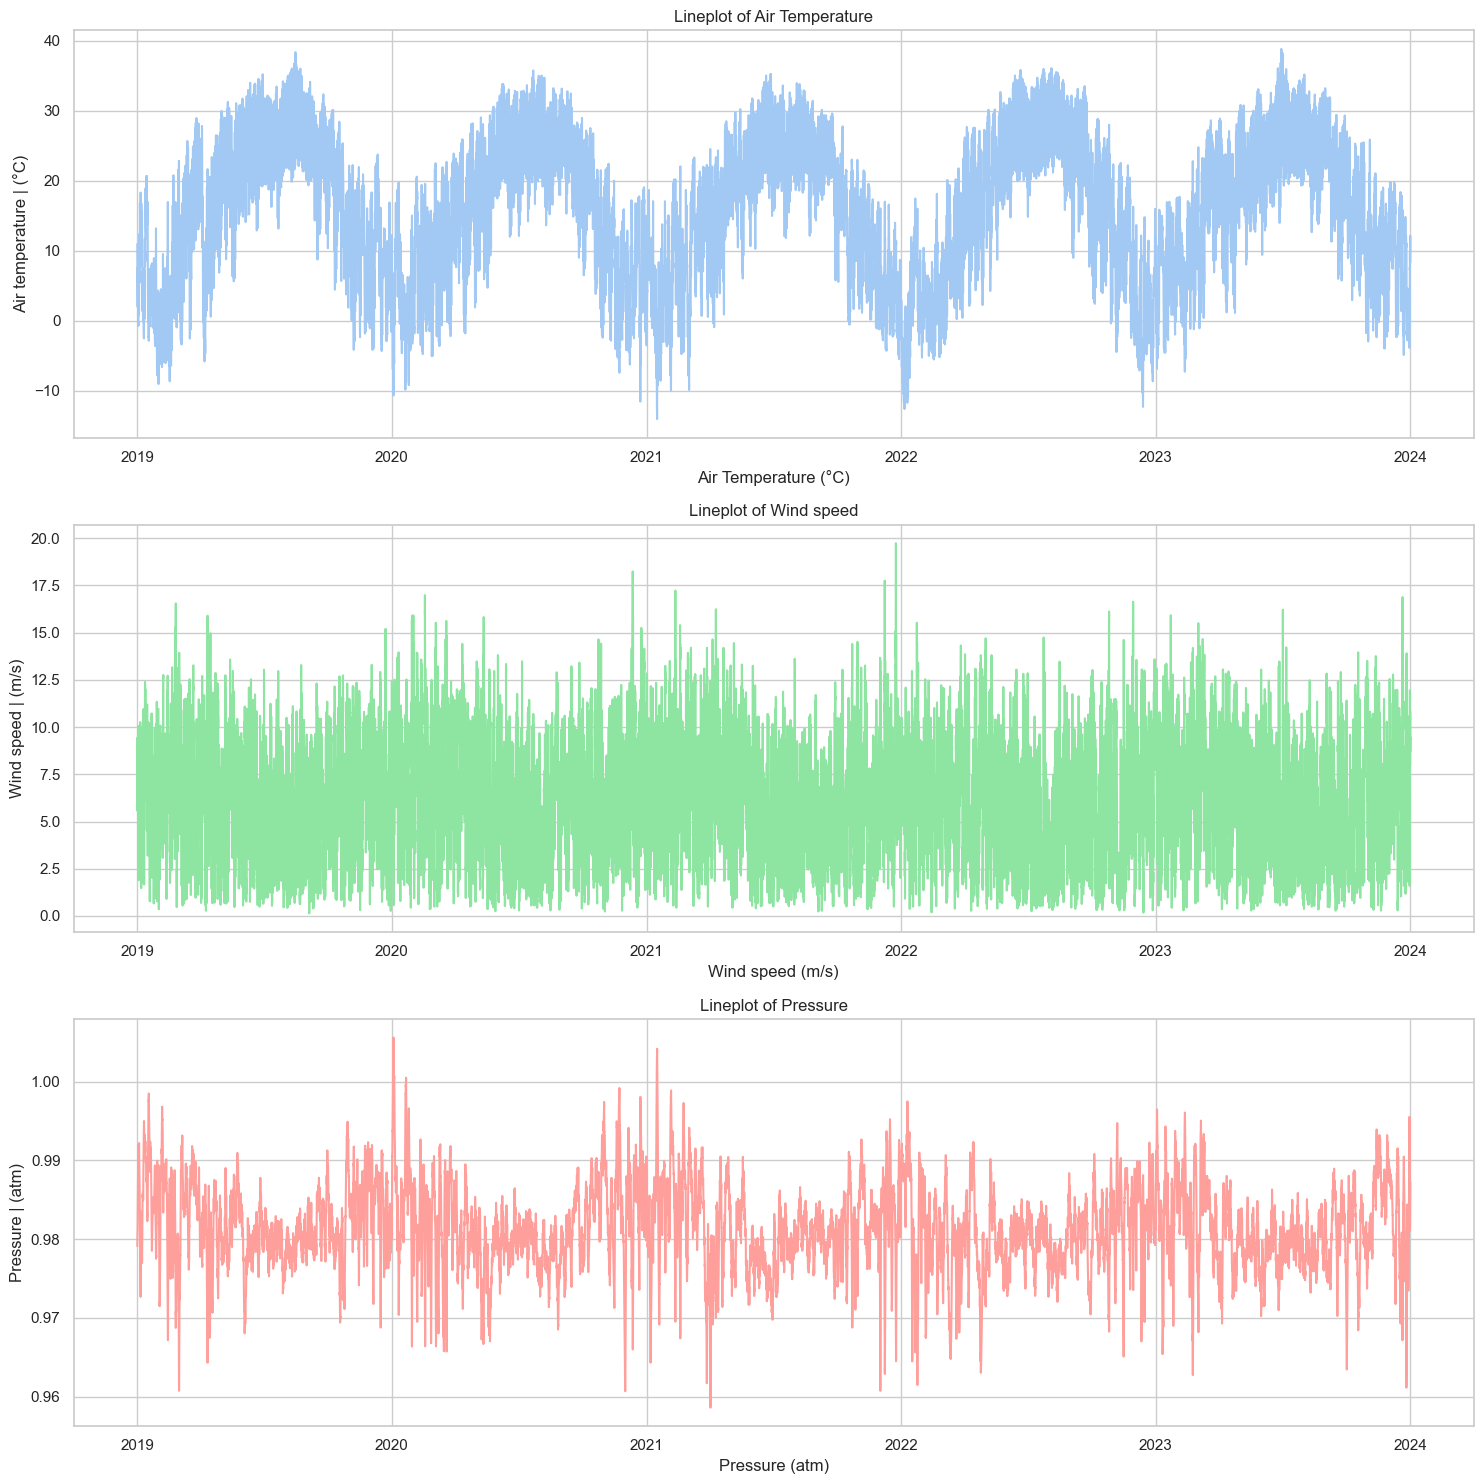

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

sns.lineplot(data=df,x='DateTime', y='Air temperature | (°C)', ax=axes[0],color=palette[0])
axes[0].set_title('Lineplot of Air Temperature')
axes[0].set_xlabel('Air Temperature (°C)')

sns.lineplot(data=df,x='DateTime', y='Wind speed | (m/s)', ax=axes[1],color=palette[2])
axes[1].set_title('Lineplot of Wind speed')
axes[1].set_xlabel('Wind speed (m/s)')

sns.lineplot(data=df,x='DateTime', y='Pressure | (atm)', ax=axes[2],color=palette[3])  
axes[2].set_title('Lineplot of Pressure')
axes[2].set_xlabel('Pressure (atm)')

plt.tight_layout()
plt.show()

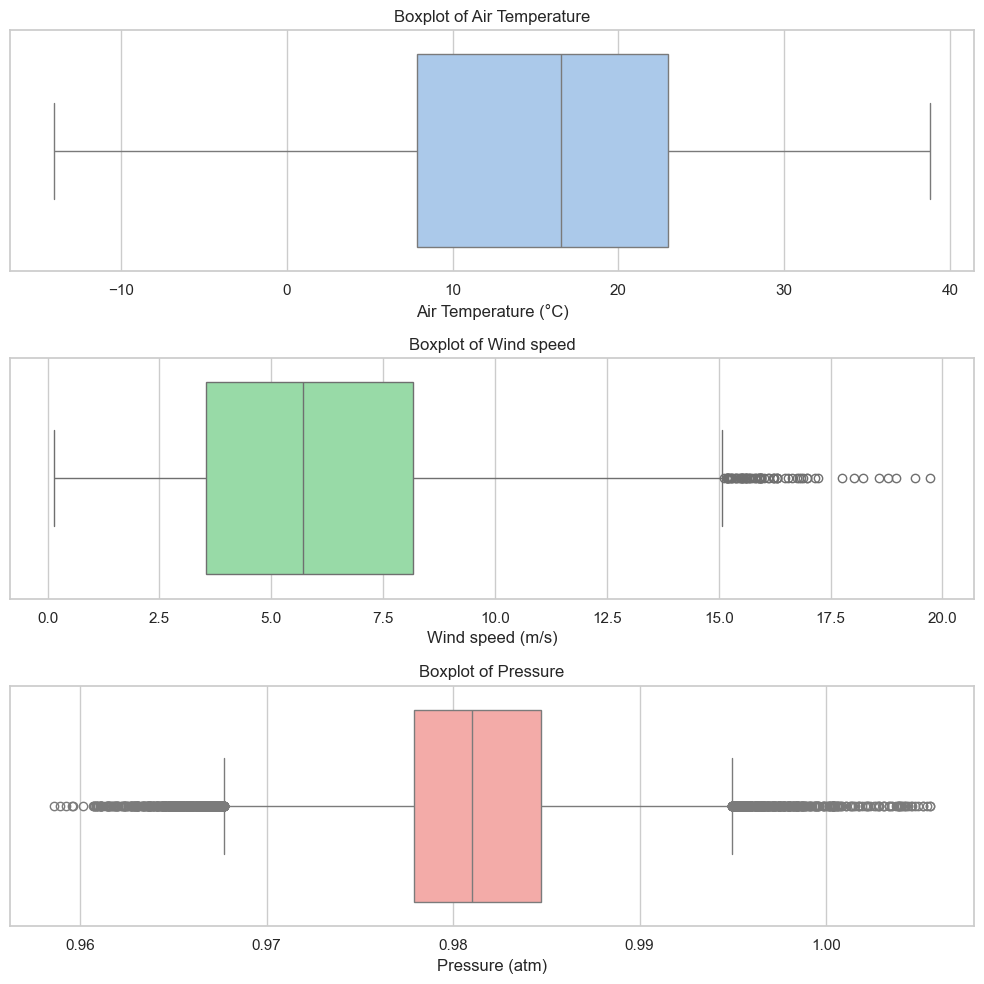

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

sns.boxplot(data=df, x='Air temperature | (°C)', ax=axes[0],color=palette[0])
axes[0].set_title('Boxplot of Air Temperature')
axes[0].set_xlabel('Air Temperature (°C)')

sns.boxplot(data=df, x='Wind speed | (m/s)', ax=axes[1],color=palette[2])
axes[1].set_title('Boxplot of Wind speed')
axes[1].set_xlabel('Wind speed (m/s)')

sns.boxplot(data=df, x='Pressure | (atm)', ax=axes[2],color=palette[3])  
axes[2].set_title('Boxplot of Pressure')
axes[2].set_xlabel('Pressure (atm)')

plt.tight_layout()
plt.show()

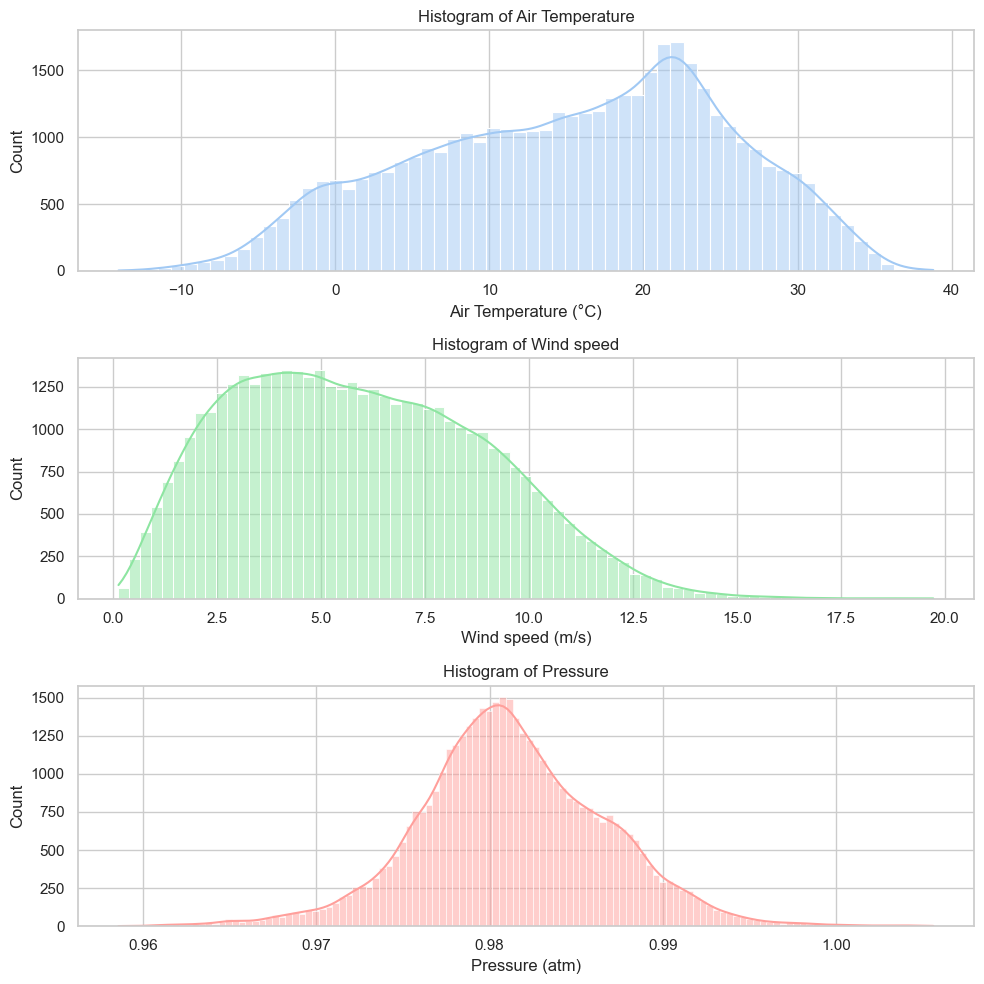

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

sns.histplot(data=df, x='Air temperature | (°C)', ax=axes[0],kde=True,color=palette[0])
axes[0].set_title('Histogram of Air Temperature')
axes[0].set_xlabel('Air Temperature (°C)')

sns.histplot(data=df, x='Wind speed | (m/s)', ax=axes[1],kde=True,color=palette[2])
axes[1].set_title('Histogram of Wind speed')
axes[1].set_xlabel('Wind speed (m/s)')

sns.histplot(data=df, x='Pressure | (atm)', ax=axes[2],kde=True,color=palette[3])
axes[2].set_title('Histogram of Pressure')
axes[2].set_xlabel('Pressure (atm)')

plt.tight_layout()
plt.show()

Target Variable

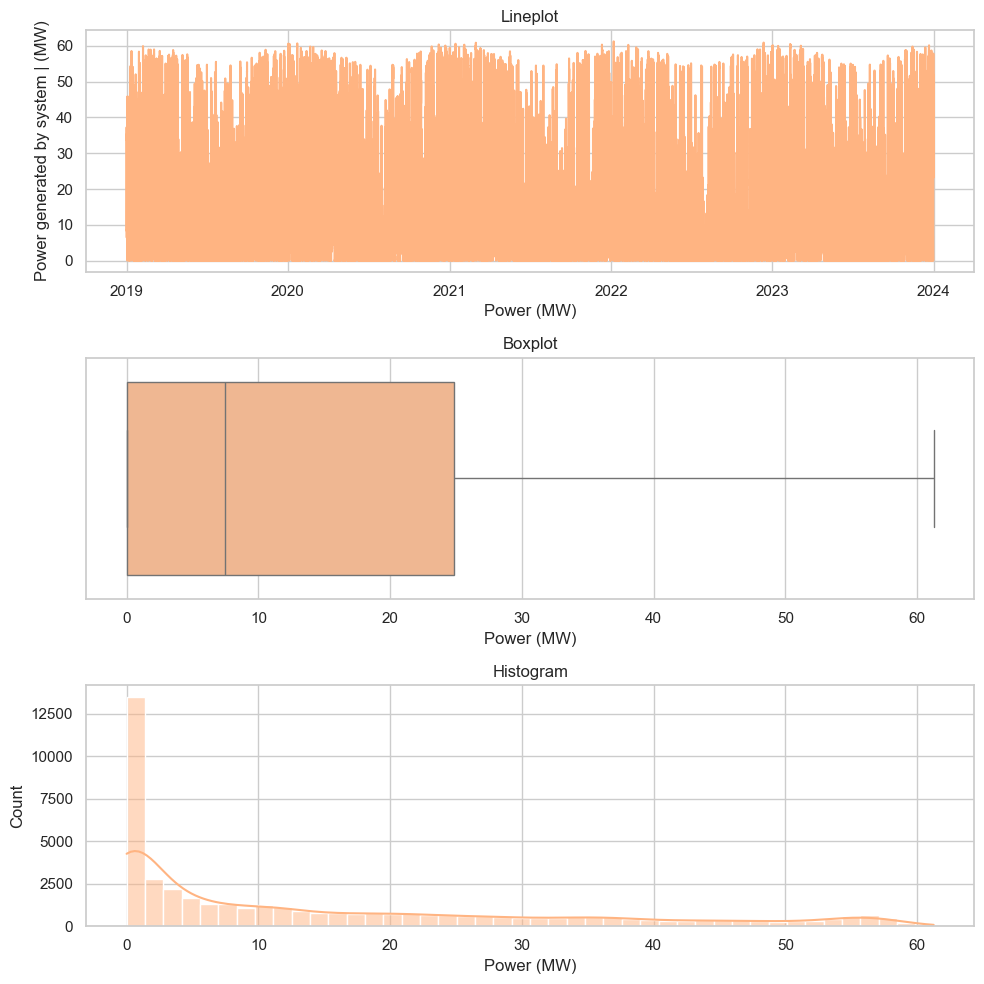

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

sns.lineplot(data=df,x='DateTime', y='Power generated by system | (MW)', ax=axes[0],color=palette[1])
axes[0].set_title('Lineplot')
axes[0].set_xlabel('Power (MW)')

sns.boxplot(data=df,x='Power generated by system | (MW)', ax=axes[1],color=palette[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Power (MW)')

sns.histplot(data=df, x='Power generated by system | (MW)', ax=axes[2],kde=True,color=palette[1])
axes[2].set_title('Histogram')
axes[2].set_xlabel('Power (MW)')

plt.tight_layout()
plt.show()

In [17]:
100*len(df[df['Power generated by system | (MW)']==0])/len(df)

25.847157885128812

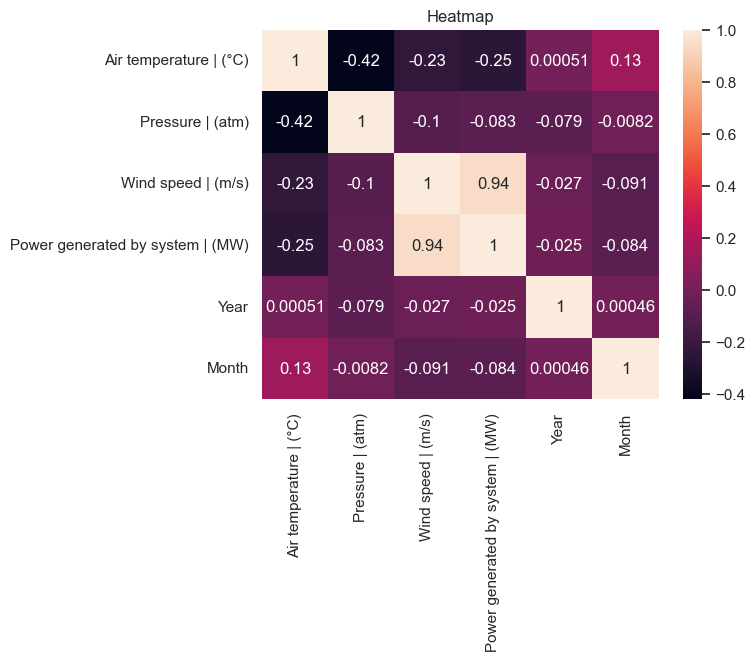

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap")
plt.show()

Stationarity Tests

ADF Test

In [19]:
from statsmodels.tsa.stattools import adfuller

adf_result=adfuller(df['Power generated by system | (MW)'])
print("ADF Result")
print("ADF Statistic: ",adf_result[0])
print("p-value: ",adf_result[1])
print("Critical values: ")

for key,value in adf_result[4].items():
    print(key," : ",value)

if adf_result[1]>0.05:
    print("Non Stationary")
else:
    print("Stationary")

ADF Result
ADF Statistic:  -21.21153899144534
p-value:  0.0
Critical values: 
1%  :  -3.430499403352111
5%  :  -2.8616060330062463
10%  :  -2.5668051472213618
Stationary


KPSS Test

In [20]:
from statsmodels.tsa.stattools import kpss

kpss_result=kpss(df['Power generated by system | (MW)'],regression='c')
print("KPSS Result")
print("KPSS Statistic: ",kpss_result[0])
print("p-value: ",kpss_result[1])
print("Critical values: ")

for key,value in kpss_result[3].items():
    print(key," : ",value)

if kpss_result[1]>0.05:
    print("Stationary")
else:
    print("Non Stationary")

KPSS Result
KPSS Statistic:  0.491826421863289
p-value:  0.04350756264340338
Critical values: 
10%  :  0.347
5%  :  0.463
2.5%  :  0.574
1%  :  0.739
Non Stationary


PP Test

In [21]:
from arch.unitroot import PhillipsPerron

pp_result=PhillipsPerron(df['Power generated by system | (MW)'])
print("PP Result")
print("PP Statistic: ",pp_result.stat)
print("p-value: ",pp_result.pvalue)
print("Critical values: ")

for key,value in pp_result.critical_values.items():
    print(key," : ",value)

if pp_result.pvalue<0.05:
    print("Stationary")
else:
    print("Non Stationary")

PP Result
PP Statistic:  -41.300980760484805
p-value:  0.0
Critical values: 
1%  :  -3.4304992328759747
5%  :  -2.8616059576614257
10%  :  -2.5668051071174345
Stationary


Variance Ratio Test

In [22]:
from arch.unitroot import VarianceRatio

vr_result=VarianceRatio(df['Power generated by system | (MW)'])
print("PP Result")
print("PP Statistic: ",vr_result.stat)
print("p-value: ",vr_result.pvalue)
print("Critical values: ")

for key,value in vr_result.critical_values.items():
    print(key," : ",value)

if vr_result.pvalue<0.05:
    print("Not a random walk (Potentially Stationary)")
else:
    print("Random Walk")

PP Result
PP Statistic:  10.343693672939265
p-value:  0.0
Critical values: 
1%  :  -2.3263478740408408
5%  :  -1.6448536269514729
10%  :  -1.2815515655446004
90%  :  1.2815515655446004
95%  :  1.644853626951472
99%  :  2.3263478740408408
Not a random walk (Potentially Stationary)


ACF Plot

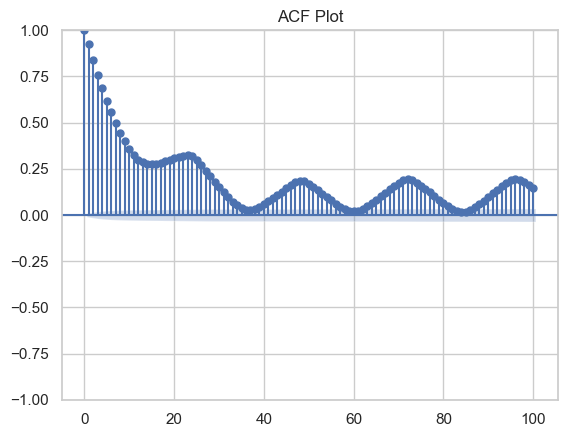

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Power generated by system | (MW)'], lags=100, ax=plt.gca())
plt.title("ACF Plot")
plt.show()

First 24 units show significant values

This shows gradual decresing trend at first then constant seasonality factor of around 24 units.

Each unit is 1hr.

Order of AR Model will be around 20.

PACF Plot

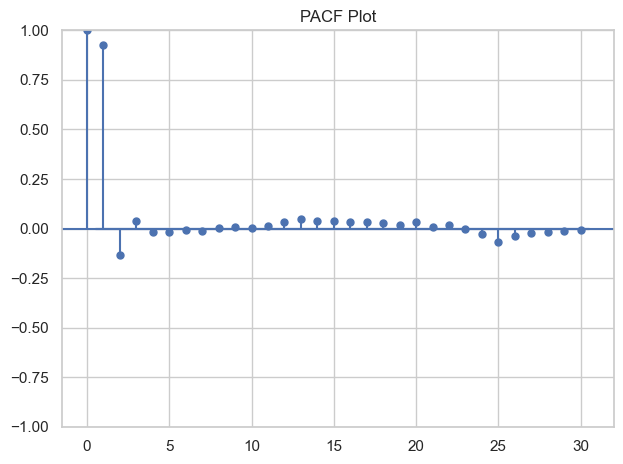

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Power generated by system | (MW)'], lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF Plot")
plt.tight_layout()
plt.show()

2 significant values.

Order of MA model will be 2.

Friedman Test

In [25]:
from scipy.stats import friedmanchisquare
monthly_data = df.pivot_table(values='Power generated by system | (MW)', index='Year', columns='Month')
monthly_data = monthly_data.dropna()
statistic, p_value = friedmanchisquare(*[monthly_data[col] for col in monthly_data.columns])
print("Friedman test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference across months, indicating seasonality.")
else:
    print("Fail to reject the null hypothesis: No significant difference across months, suggesting no seasonality.")

Friedman test statistic: 46.13846153846154
p-value: 3.0561821426017266e-06
Reject the null hypothesis: There is a significant difference across months, indicating seasonality.


Seasonal Kendall Test

In [26]:
monthly_data = df.groupby(df.index.month).mean()
monthly_data.head()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW),Year,Month
DateTime,,,,,,
1,3.656320,0.984770,6.596120,18.459874,2021.000538,1.0
2,5.161859,0.982739,6.976347,20.373770,2020.992908,2.0
3,12.192488,0.982102,7.008348,21.365359,2021.000000,3.0
4,15.267856,0.979851,6.813962,19.959535,2021.000000,4.0
5,20.669690,0.979430,5.890542,13.793427,2021.000000,5.0


In [27]:
from scipy.stats import kendalltau
results = {}
months = range(1, 13) 

for month in months:
    month_values = df[df.index.month == month]['Power generated by system | (MW)']
    if len(month_values) > 1:
        time_index = np.arange(len(month_values))
        tau, p_value = kendalltau(time_index, month_values)
        results[month] = {'tau': tau, 'p-value': p_value}

print("Seasonal Kendall Test Results (per month):")
for month, result in results.items():
    print(f"Month: {month}, tau: {result['tau']:.3f}, p-value: {result['p-value']:.3f}")


Seasonal Kendall Test Results (per month):
Month: 1, tau: -0.032, p-value: 0.003
Month: 2, tau: -0.035, p-value: 0.003
Month: 3, tau: 0.008, p-value: 0.455
Month: 4, tau: -0.028, p-value: 0.014
Month: 5, tau: -0.099, p-value: 0.000
Month: 6, tau: -0.030, p-value: 0.011
Month: 7, tau: -0.005, p-value: 0.643
Month: 8, tau: 0.041, p-value: 0.000
Month: 9, tau: -0.037, p-value: 0.001
Month: 10, tau: -0.028, p-value: 0.013
Month: 11, tau: -0.029, p-value: 0.012
Month: 12, tau: 0.032, p-value: 0.004


Mostly Negative trends are seend throughout the months with exceptions of December, August, March.

No significant trends in months of March, April, June, July, October.

Ljung Box Test

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(df['Power generated by system | (MW)'], lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_result)

Ljung-Box Test Results:
          lb_stat  lb_pvalue
10  176581.998959        0.0


Autocorrelation present in data.

Fourier Transform

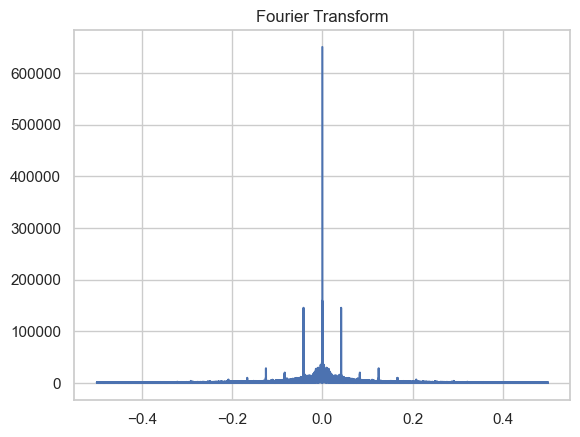

In [29]:
fft = np.fft.fft(df['Power generated by system | (MW)'])
frequencies = np.fft.fftfreq(len(df['Power generated by system | (MW)']))
plt.plot(frequencies, np.abs(fft))
plt.title('Fourier Transform')
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller
df['seasonal_diff'] = df['Power generated by system | (MW)'].diff(12)
adf_test = adfuller(df['seasonal_diff'].dropna())
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")

ADF Statistic: -41.494643379033825, p-value: 0.0


STL

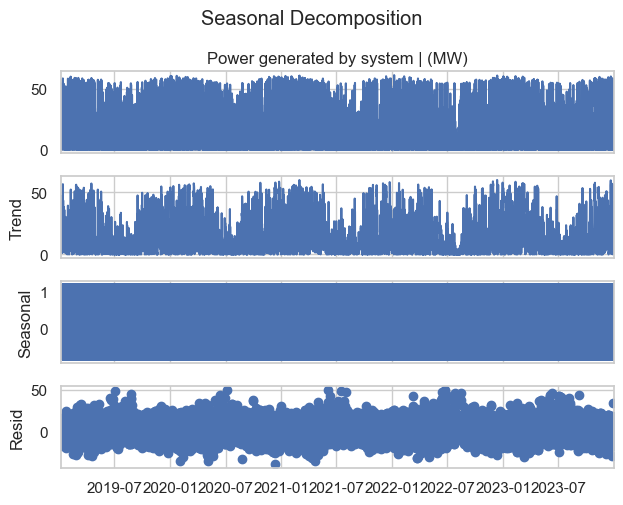

In [31]:
df1 = df.asfreq('h').dropna()
decomposition = sm.tsa.seasonal_decompose(df1['Power generated by system | (MW)'], model='additive', period=12)
fig = decomposition.plot()
plt.suptitle('Seasonal Decomposition', y=1.05)
plt.show()

Seasonal Subseries

/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/155850941.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


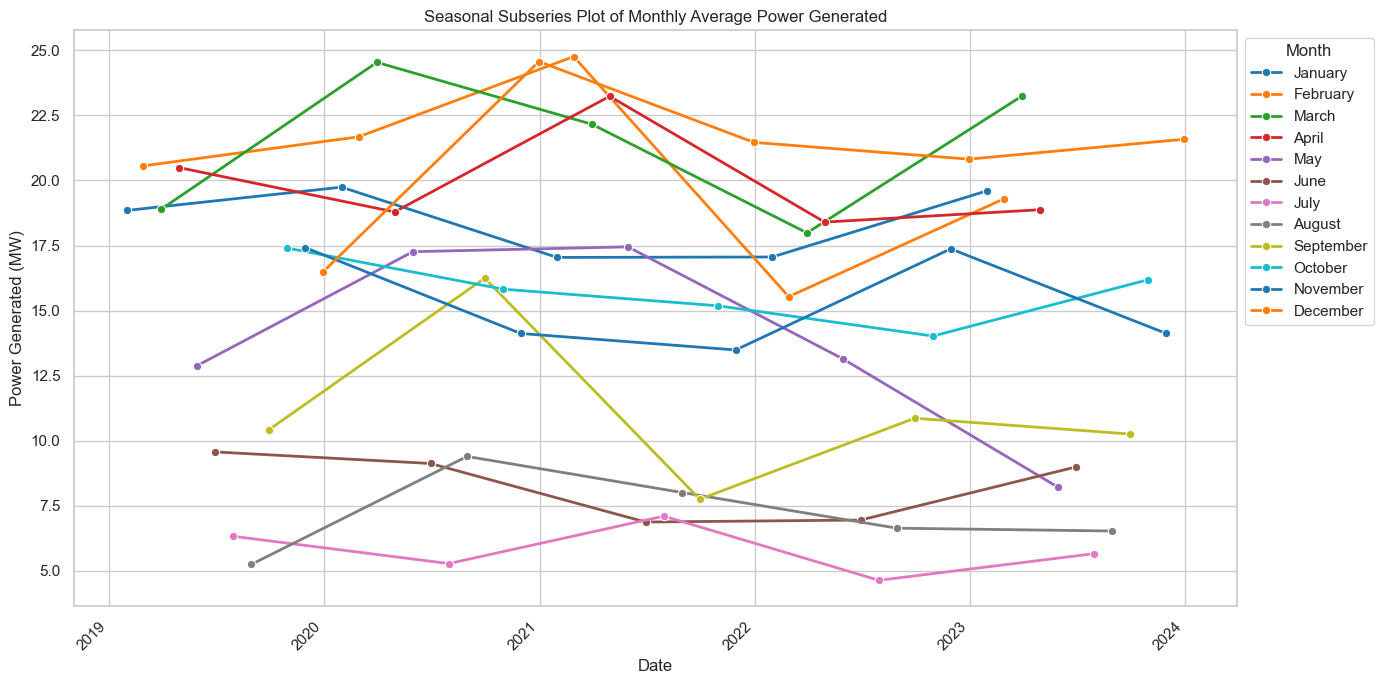

In [32]:
monthly_avg = df.resample('M').mean()
monthly_avg['Month'] = monthly_avg.index.month_name()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='Power generated by system | (MW)', 
             hue='Month', palette='tab10', marker='o', linewidth=2)
plt.title('Seasonal Subseries Plot of Monthly Average Power Generated')
plt.xlabel('Date')
plt.ylabel('Power Generated (MW)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Prediction values

In [112]:
start = len(df)
end = start + len(test) - 1
actual = test['Power generated by system | (MW)']

ARMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p, q = 24, 2  
model = ARIMA(df['Power generated by system | (MW)'], order=(p, 0, q))
arma_result = model.fit()
print(arma_result.summary())

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregres

                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:                              ARIMA(24, 0, 2)   Log Likelihood             -143729.768
Date:                              Fri, 01 Nov 2024   AIC                         287515.537
Time:                                      17:10:24   BIC                         287758.799
Sample:                                           0   HQIC                        287592.207
                                            - 43823                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8424      0.707     20.986      0.000      13.456      16.229
ar.L1          0.47

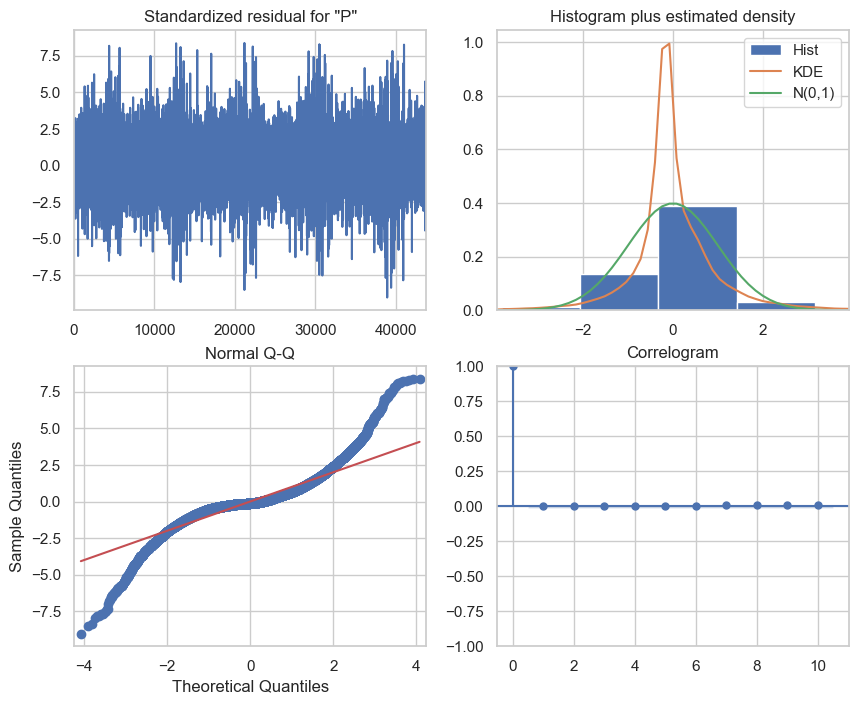

In [ ]:
arma_result.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
predictions = arma_result.predict(start=start, end=end, dynamic=False)
test['ARMA_Prediction'] = predictions.values

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted = test['ARMA_Prediction']

r2 = r2_score(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R² Score: -0.0648
Root Mean Squared Error (RMSE): 19.9814
Mean Squared Error (MSE): 399.2545
Mean Absolute Error (MAE): 16.2568


ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
p, q = 24, 2  
model_arima = ARIMA(df['Power generated by system | (MW)'], order=(p, 1, q))
arima_result = model_arima.fit()
print(arima_result.summary())

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:                              ARIMA(24, 1, 2)   Log Likelihood             -143950.806
Date:                              Fri, 01 Nov 2024   AIC                         287955.611
Time:                                      17:31:07   BIC                         288190.184
Sample:                                           0   HQIC                        288029.543
                                            - 43823                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5220      0.101      5.184      0.000       0.325       0.719
ar.L2         -0.25

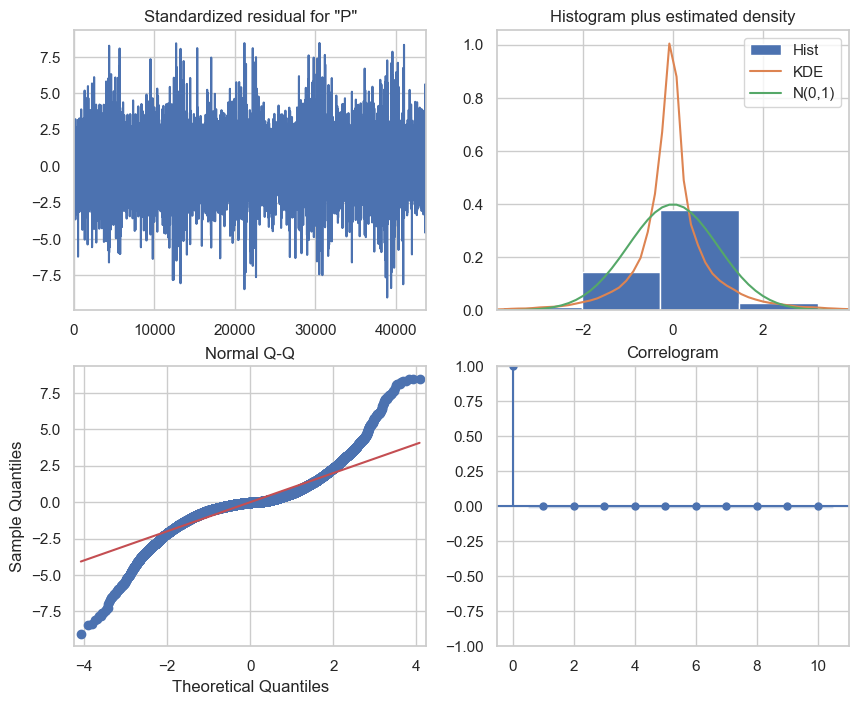

In [ ]:
arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
predictions = arima_result.predict(start=start, end=end, dynamic=False)
test['ARIMA_Prediction'] = predictions.values

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted = test['ARIMA_Prediction']

r2 = r2_score(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R² Score: -1.0044
Root Mean Squared Error (RMSE): 27.4147
Mean Squared Error (MSE): 751.5640
Mean Absolute Error (MAE): 24.0861


SARIMA

AIC

In [ ]:
import itertools
import statsmodels.api as sm

p, d, q = 24, 0, 2
pdq = [(p, d, q)] 
P = D = Q = range(0, 3)
s = 12 

seasonal_pdq = list(itertools.product(P, D, Q, [s]))

best_aic = float('inf')
best_params = None

# Grid search over seasonal parameters
for seasonal_param in seasonal_pdq:
    try:
        model = sm.tsa.SARIMAX(
            df['Power generated by system | (MW)'],
            order=(p, d, q),
            seasonal_order=seasonal_param,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_params = ((p, d, q), seasonal_param)
            
    except Exception as e:
        print(f"An error occurred with parameters {seasonal_param}: {e}")
        continue

print(f'Best SARIMA parameters: {best_params} with AIC: {best_aic}')


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28381D+00    |proj g|=  1.02624D-01


 This problem is unconstrained.



At iterate    5    f=  3.28204D+00    |proj g|=  1.08917D-02

At iterate   10    f=  3.28193D+00    |proj g|=  8.58952D-04

At iterate   15    f=  3.28193D+00    |proj g|=  2.74997D-04

At iterate   20    f=  3.28193D+00    |proj g|=  5.30236D-04

At iterate   25    f=  3.28190D+00    |proj g|=  7.34740D-03

At iterate   30    f=  3.28182D+00    |proj g|=  8.20377D-03

At iterate   35    f=  3.28173D+00    |proj g|=  2.78596D-03

At iterate   40    f=  3.28170D+00    |proj g|=  3.63546D-03

At iterate   45    f=  3.28165D+00    |proj g|=  2.28299D-03


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.28163D+00    |proj g|=  1.33061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   27     50     57      1     0     0   1.331D-03   3.282D+00
  F =   3.2816331897457656     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37857D+00    |proj g|=  6.03912D-01


 This problem is unconstrained.



At iterate    5    f=  3.28259D+00    |proj g|=  3.26720D-02

At iterate   10    f=  3.28091D+00    |proj g|=  3.86252D-03

At iterate   15    f=  3.28081D+00    |proj g|=  5.16590D-03

At iterate   20    f=  3.27993D+00    |proj g|=  4.00012D-02

At iterate   25    f=  3.27556D+00    |proj g|=  8.37358D-02

At iterate   30    f=  3.27230D+00    |proj g|=  6.74555D-02

At iterate   35    f=  3.26963D+00    |proj g|=  2.88342D-01

At iterate   40    f=  3.26899D+00    |proj g|=  1.86864D-01

At iterate   45    f=  3.26876D+00    |proj g|=  5.89382D-02


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.26863D+00    |proj g|=  6.97999D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28     50     79      1     0     0   6.980D-02   3.269D+00
  F =   3.2686277229395206     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36600D+00    |proj g|=  3.15728D-01

At iterate    5    f=  3.28274D+00    |proj g|=  7.52624D-02

At iterate   10    f=  3.28015D+00    |proj g|=  1.20436D-02

At iterate   15    f=  3.27989D+00    |proj g|=  4.40105D-03

At iterate   20    f=  3.27975D+00    |proj g|=  6.57007D-03

At iterate   25    f=  3.27788D+00    |proj g|=  7.63812D-02

At iterate   30    f=  3.27351D+00    |proj g|=  1.69838D-01

At iterate   35    f=  3.27123D+00    |proj g|=  2.49884D-01

At iterate   40    f=  3.26951D+00    |proj g|=  1.61900D-01

At iterate   45    f=  3.26888D+00    |proj g|=  2.23226D-01


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.26858D+00    |proj g|=  1.89793D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     50     72      1     0     0   1.898D-01   3.269D+00
  F =   3.2685847204628629     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47933D+00    |proj g|=  2.88204D-01


 This problem is unconstrained.



At iterate    5    f=  3.43958D+00    |proj g|=  4.80915D-02

At iterate   10    f=  3.43439D+00    |proj g|=  2.11721D-02

At iterate   15    f=  3.42903D+00    |proj g|=  4.84269D-02

At iterate   20    f=  3.42065D+00    |proj g|=  2.63697D-02

At iterate   25    f=  3.41968D+00    |proj g|=  4.10811D-03

At iterate   30    f=  3.41951D+00    |proj g|=  4.21910D-03

At iterate   35    f=  3.41908D+00    |proj g|=  5.41670D-03

At iterate   40    f=  3.41902D+00    |proj g|=  2.75460D-03

At iterate   45    f=  3.41898D+00    |proj g|=  1.59576D-03


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.41897D+00    |proj g|=  4.33331D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   27     50     57      1     0     0   4.333D-04   3.419D+00
  F =   3.4189733827484781     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42457D+00    |proj g|=  2.25068D-01


 This problem is unconstrained.



At iterate    5    f=  3.33998D+00    |proj g|=  1.39631D-01

At iterate   10    f=  3.30263D+00    |proj g|=  1.28262D-01

At iterate   15    f=  3.29523D+00    |proj g|=  5.59286D-02

At iterate   20    f=  3.29214D+00    |proj g|=  3.91450D-02

At iterate   25    f=  3.28207D+00    |proj g|=  4.49402D-02

At iterate   30    f=  3.27532D+00    |proj g|=  3.14875D-02

At iterate   35    f=  3.27459D+00    |proj g|=  1.26353D-02

At iterate   40    f=  3.27448D+00    |proj g|=  2.24866D-03

At iterate   45    f=  3.27447D+00    |proj g|=  7.75182D-04


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.27447D+00    |proj g|=  1.64540D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28     50     63      1     0     0   1.645D-03   3.274D+00
  F =   3.2744675190679025     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41877D+00    |proj g|=  3.56558D-01

At iterate    5    f=  3.30682D+00    |proj g|=  9.81928D-02

At iterate   10    f=  3.29500D+00    |proj g|=  3.66639D-02

At iterate   15    f=  3.28810D+00    |proj g|=  5.10660D-02

At iterate   20    f=  3.27292D+00    |proj g|=  1.97808D-01

At iterate   25    f=  3.26948D+00    |proj g|=  1.54064D-02

At iterate   30    f=  3.26910D+00    |proj g|=  8.23899D-03

At iterate   35    f=  3.26885D+00    |proj g|=  1.39954D-02

At iterate   40    f=  3.26812D+00    |proj g|=  2.97490D-02

At iterate   45    f=  3.26425D+00    |proj g|=  8.51816D-02


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.26076D+00    |proj g|=  8.94734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     50     64      1     0     0   8.947D-02   3.261D+00
  F =   3.2607561440626762     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88911D+00    |proj g|=  5.33221D-01


 This problem is unconstrained.



At iterate    5    f=  3.80430D+00    |proj g|=  7.08953D-02

At iterate   10    f=  3.78988D+00    |proj g|=  5.23762D-02

At iterate   15    f=  3.77005D+00    |proj g|=  6.12050D-02

At iterate   20    f=  3.75465D+00    |proj g|=  2.74311D-02

At iterate   25    f=  3.75291D+00    |proj g|=  9.09277D-03

At iterate   30    f=  3.75233D+00    |proj g|=  1.57727D-02

At iterate   35    f=  3.74891D+00    |proj g|=  1.94599D-02

At iterate   40    f=  3.74872D+00    |proj g|=  1.96240D-03

At iterate   45    f=  3.74869D+00    |proj g|=  2.30448D-03


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.74866D+00    |proj g|=  1.01482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   27     50     58      1     0     0   1.015D-03   3.749D+00
  F =   3.7486550401845569     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64303D+00    |proj g|=  6.57569D-01


 This problem is unconstrained.



At iterate    5    f=  3.55992D+00    |proj g|=  8.40600D-02

At iterate   10    f=  3.54511D+00    |proj g|=  4.74201D-02

At iterate   15    f=  3.53389D+00    |proj g|=  2.31239D-01

At iterate   20    f=  3.50559D+00    |proj g|=  1.38527D-01

At iterate   25    f=  3.45519D+00    |proj g|=  4.86626D-01

At iterate   30    f=  3.42595D+00    |proj g|=  4.88501D-01

At iterate   35    f=  3.42132D+00    |proj g|=  1.28485D-01

At iterate   40    f=  3.42062D+00    |proj g|=  3.86547D-02

At iterate   45    f=  3.42032D+00    |proj g|=  1.25453D-02


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.42029D+00    |proj g|=  3.83700D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28     50     62      1     0     0   3.837D-03   3.420D+00
  F =   3.4202859245574508     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61916D+00    |proj g|=  4.34594D-01

At iterate    5    f=  3.56202D+00    |proj g|=  1.27731D-01

At iterate   10    f=  3.52281D+00    |proj g|=  5.04588D-02

At iterate   15    f=  3.47608D+00    |proj g|=  4.59368D-01

At iterate   20    f=  3.45640D+00    |proj g|=  4.10001D-01

At iterate   25    f=  3.43998D+00    |proj g|=  2.91884D+00

At iterate   30    f=  3.41458D+00    |proj g|=  3.96930D+00

At iterate   35    f=  3.41165D+00    |proj g|=  9.09199D+00

At iterate   40    f=  3.41129D+00    |proj g|=  1.33286D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     45    110      2     0     0   1.236D+00   3.411D+00
  F =   3.4112059371890187     

ABNORMAL_TERMINATION_IN_LNSRCH                              
An error occurred with parameters (1, 0, 0, 12): Invalid model: autoregressive lag(s) {np.int64(12)} are in both the seasonal and non-seasonal autoregressive components.
An error occurred with parameters (1, 0, 1, 12): Invalid model: autoregressive lag(s) {np.int64(12)} are in both the seasonal and non-seasonal autoregressive components.
An error occurred with parameters (1, 0, 2, 12): Invalid model: autoregressive lag(

SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 24, 0, 2
P, D, Q, s = 0, 1, 2, 12
model_sarima = SARIMAX(df['Power generated by system | (MW)'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = model_sarima.fit()
print(sarima_result.summary())

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41877D+00    |proj g|=  3.56558D-01

At iterate    5    f=  3.30682D+00    |proj g|=  9.81928D-02

At iterate   10    f=  3.29500D+00    |proj g|=  3.66639D-02

At iterate   15    f=  3.28810D+00    |proj g|=  5.10660D-02

At iterate   20    f=  3.27292D+00    |proj g|=  1.97808D-01

At iterate   25    f=  3.26948D+00    |proj g|=  1.54064D-02

At iterate   30    f=  3.26910D+00    |proj g|=  8.23899D-03

At iterate   35    f=  3.26885D+00    |proj g|=  1.39954D-02

At iterate   40    f=  3.26812D+00    |proj g|=  2.97490D-02

At iterate   45    f=  3.26425D+00    |proj g|=  8.51816D-02


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.26076D+00    |proj g|=  8.94734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     50     64      1     0     0   8.947D-02   3.261D+00
  F =   3.2607561440626762     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:              SARIMAX(24, 0, 2)x(0, 1, 2, 12)   Log Likelihood             -142896.117
Date:                              Sun, 03 Nov 2024   AIC                         

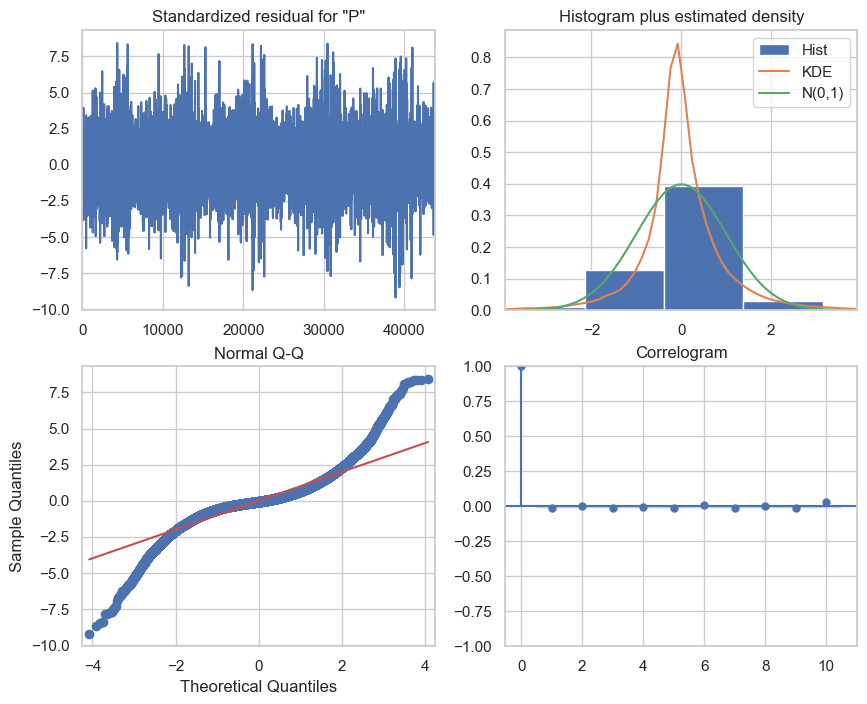

In [ ]:
sarima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
predictions = sarima_result.predict(start=start, end=end, dynamic=False)
test['SARIMA_Prediction'] = predictions.values

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted = test['SARIMA_Prediction']

r2 = r2_score(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R² Score: 0.0502
Root Mean Squared Error (RMSE): 18.8715
Mean Squared Error (MSE): 356.1330
Mean Absolute Error (MAE): 16.1871


In [ ]:
test.to_csv("results1.csv")

CHARMA

GARCH ON SARIMA

Parameters P,D,Q found from AIC

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 24, 0, 2
P, D, Q, s = 0, 1, 2, 12
model_sarima = SARIMAX(df['Power generated by system | (MW)'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = model_sarima.fit()
print(sarima_result.summary())
residuals = sarima_result.resid

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41877D+00    |proj g|=  3.56558D-01

At iterate    5    f=  3.30682D+00    |proj g|=  9.81928D-02

At iterate   10    f=  3.29500D+00    |proj g|=  3.66639D-02

At iterate   15    f=  3.28810D+00    |proj g|=  5.10660D-02

At iterate   20    f=  3.27292D+00    |proj g|=  1.97808D-01

At iterate   25    f=  3.26948D+00    |proj g|=  1.54064D-02

At iterate   30    f=  3.26910D+00    |proj g|=  8.23899D-03

At iterate   35    f=  3.26885D+00    |proj g|=  1.39954D-02

At iterate   40    f=  3.26812D+00    |proj g|=  2.97490D-02

At iterate   45    f=  3.26425D+00    |proj g|=  8.51816D-02

At iterate   50    f=  3.26076D+00    |proj g|=  8.94734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:              SARIMAX(24, 0, 2)x(0, 1, 2, 12)   Log Likelihood             -142896.117
Date:                              Sun, 03 Nov 2024   AIC                         285850.233
Time:                                      23:49:41   BIC                         286102.157
Sample:                                           0   HQIC                        285929.637
                                            - 43823                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6053      0.184      3.288      0.001       0.245       0.966
ar.L2          0.14

In [35]:
from arch import arch_model

garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -138146.
Distribution:                  Normal   AIC:                           276299.
Method:            Maximum Likelihood   BIC:                           276334.
                                        No. Observations:                43823
Date:                Sun, Nov 03 2024   Df Residuals:                    43822
Time:                        23:49:48   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.3520  4.545e-02     -7.746  9.512e-15 [ -0.441, -0.26

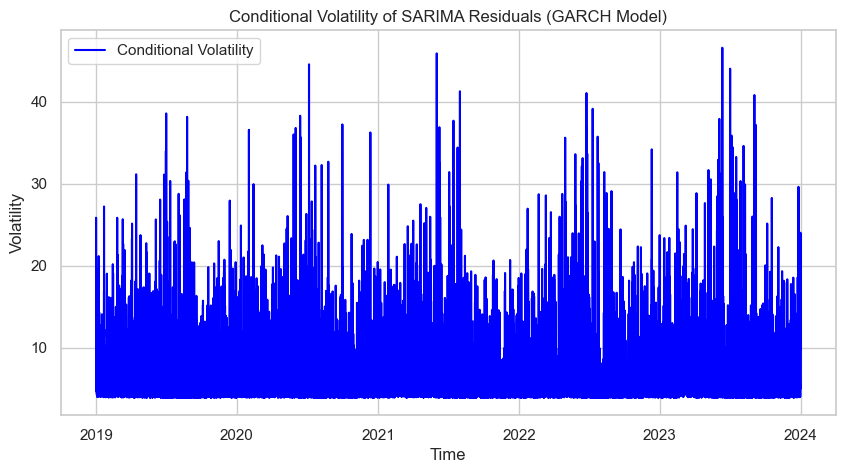

In [36]:
conditional_volatility = garch_result.conditional_volatility

plt.figure(figsize=(10, 5))
plt.plot(conditional_volatility, color='blue', label='Conditional Volatility')
plt.title('Conditional Volatility of SARIMA Residuals (GARCH Model)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

RCA Model

In [113]:
# RCA(1) Parameters
phi_mean = 0.5  # Mean of random coefficient
phi_std = 0.1   # Std deviation of random coefficient
sigma = 1       # Standard deviation of noise

n = len(df)

phi_t = np.random.normal(loc=phi_mean, scale=phi_std, size=n)
epsilon_t = np.random.normal(0, sigma, size=n)
rca_values = np.zeros(n)

rca_values[0] = df['Power generated by system | (MW)'].iloc[0]

for t in range(1, n):
    rca_values[t] = phi_t[t] * df['Power generated by system | (MW)'].iloc[t-1] + epsilon_t[t]

df['RCA_Simulated'] = rca_values

In [114]:
n_test = len(test)
rca_predictions = np.zeros(n_test)

rca_predictions[0] = df['Power generated by system | (MW)'].iloc[-1] 
for t in range(1, n_test):
    rca_predictions[t] = np.random.normal(loc=phi_mean, scale=phi_std) * rca_predictions[t-1] + np.random.normal(0, sigma)
test['RCA_Prediction'] = rca_predictions

actual = test['Power generated by system | (MW)'].values
predicted = test['RCA_Prediction'].values

In [115]:
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R² Score: -1.1299
Root Mean Squared Error (RMSE): 28.2597
Mean Squared Error (MSE): 798.6127
Mean Absolute Error (MAE): 20.7031


Non Linearity Tests

Engle's ARCH Test

In [53]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(df['Power generated by system | (MW)'])
test_statistic = arch_test[0]
p_value = arch_test[1]

print(f"ARCH Test Statistic: {test_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is significant evidence of ARCH effects (heteroskedasticity) in the time series.")
    print("Recommendation: Consider using ARCH/GARCH models to account for volatility clustering.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("No significant evidence of ARCH effects (heteroskedasticity) in the time series.")
    print("Recommendation: Standard time series models may be appropriate.")

ARCH Test Statistic: 36037.2057
p-value: 0.0000

Conclusion: Reject the null hypothesis.
There is significant evidence of ARCH effects (heteroskedasticity) in the time series.
Recommendation: Consider using ARCH/GARCH models to account for volatility clustering.


Tariff and Regime Switching Models

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Non-linearity Test Results:
--------------------------------------------------

1. Regime Properties:
Mean difference between regimes: 33.8402
Standardized mean difference: 1.9635
Data standard deviation: 17.2348

2. Transition Probability Matrix:
[[0.96719749 0.03280251]
 [0.08890213 0.91109787]]
Persistence measure: 0.9391

3. Expected Duration of Regimes:
[30.48546986 11.24832408]

4. Regime Classification Measure: 50.0000

Conclusions:
--------------------------------------------------
1. Strong evidence of distinct regimes
   (Standardized mean difference: 1.96 > 1)
2. High regime persistence detected
   (Persistence measure: 0.94 > 0.7)
3. Poor regime classification
   (RCM: 50.00 >= 50)

Overall: Strong evidence of non-linear regime-switching behavior


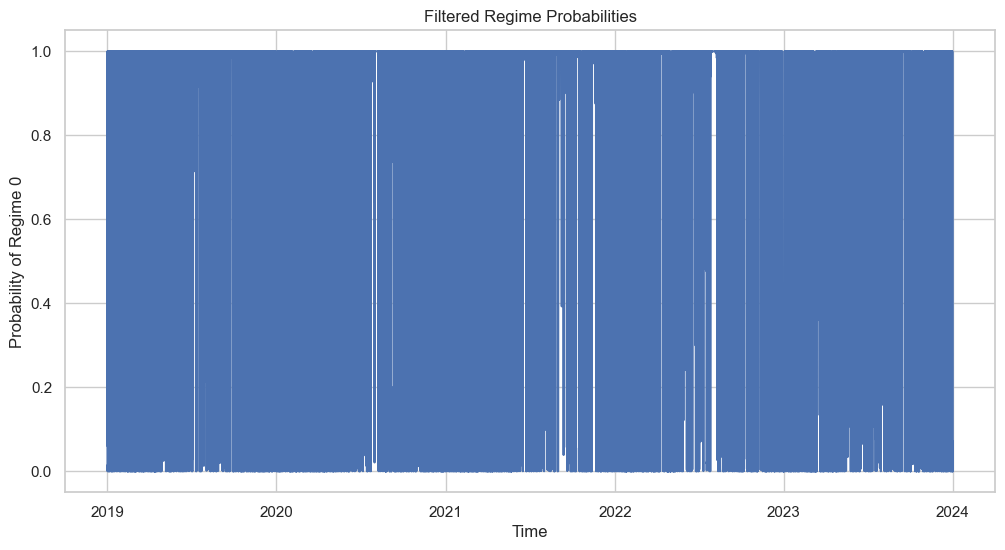

In [57]:
data = df['Power generated by system | (MW)'].dropna()
model = sm.tsa.MarkovRegression(data, k_regimes=2, trend='c')
model_fit = model.fit()
filtered_probs = model_fit.filtered_marginal_probabilities[0]

# 2. Calculate regime durations
expected_durations = model_fit.expected_durations

# 3. Get transition probability matrix and reshape it properly
transition_matrix = model_fit.regime_transition
transition_matrix = np.array([[transition_matrix[0][0][0], transition_matrix[1][0][0]], 
                            [transition_matrix[0][1][0], transition_matrix[1][1][0]]])

# Calculate metrics
means = model_fit.params[[i for i in model_fit.params.index if 'const' in i]]
mean_diff = abs(means.iloc[0] - means.iloc[1])
std_dev = np.std(data)
regime_distinction_stat = mean_diff / std_dev

# Calculate persistence measure using reshaped transition matrix
persistence_measure = np.trace(transition_matrix) / transition_matrix.shape[0]

# Calculate RCM
regime_probs = pd.DataFrame(model_fit.filtered_marginal_probabilities).T
rcm = 100 * (1 - np.mean(np.max(regime_probs, axis=1) - np.mean(regime_probs, axis=1)))

print("Non-linearity Test Results:")
print("-" * 50)
print("\n1. Regime Properties:")
print(f"Mean difference between regimes: {mean_diff:.4f}")
print(f"Standardized mean difference: {regime_distinction_stat:.4f}")
print(f"Data standard deviation: {std_dev:.4f}")

print("\n2. Transition Probability Matrix:")
print(transition_matrix)
print(f"Persistence measure: {persistence_measure:.4f}")

print("\n3. Expected Duration of Regimes:")
print(expected_durations)

print(f"\n4. Regime Classification Measure: {rcm:.4f}")

print("\nConclusions:")
print("-" * 50)

# Interpret results based on the metrics
if regime_distinction_stat > 1:
    print("1. Strong evidence of distinct regimes")
    print(f"   (Standardized mean difference: {regime_distinction_stat:.2f} > 1)")
else:
    print("1. Weak evidence of distinct regimes")
    print(f"   (Standardized mean difference: {regime_distinction_stat:.2f} <= 1)")

if persistence_measure > 0.7:
    print("2. High regime persistence detected")
    print(f"   (Persistence measure: {persistence_measure:.2f} > 0.7)")
else:
    print("2. Low regime persistence detected")
    print(f"   (Persistence measure: {persistence_measure:.2f} <= 0.7)")

if rcm < 50:
    print("3. Clear regime classification")
    print(f"   (RCM: {rcm:.2f} < 50)")
else:
    print("3. Poor regime classification")
    print(f"   (RCM: {rcm:.2f} >= 50)")

# Overall conclusion
if (regime_distinction_stat > 1 and persistence_measure > 0.7) or rcm < 50:
    print("\nOverall: Strong evidence of non-linear regime-switching behavior")
else:
    print("\nOverall: Weak evidence of non-linear regime-switching behavior")

# Optional: Plot regime probabilities
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_probs)
    plt.title('Filtered Regime Probabilities')
    plt.xlabel('Time')
    plt.ylabel('Probability of Regime 0')
    plt.grid(True)
    plt.show()
except ImportError:
    print("\nNote: Matplotlib not available for visualization")

Non Linearity in data

Two Regime TAR Model

In [116]:
from statsmodels.tsa.ar_model import AutoReg

data = df['Power generated by system | (MW)'].dropna()
threshold = data.mean()
regime = (data > threshold).astype(int)
data_lagged = data.shift(1).dropna()
regime_lagged = regime.shift(1).dropna()

data_lagged = data_lagged.dropna()
regime_lagged = regime_lagged.dropna()

data_lagged = data_lagged[regime_lagged.index]
regime_lagged = regime_lagged[regime_lagged.index]

model_lower = AutoReg(data_lagged[regime_lagged == 0], lags=1).fit()
model_upper = AutoReg(data_lagged[regime_lagged == 1], lags=1).fit()

print("Lower Regime Model Summary:")
print(model_lower.summary())

print("\nUpper Regime Model Summary:")
print(model_upper.summary())

Lower Regime Model Summary:
                                   AutoReg Model Results                                    
Dep. Variable:     Power generated by system | (MW)   No. Observations:                27658
Model:                                   AutoReg(1)   Log Likelihood              -67667.575
Method:                             Conditional MLE   S.D. of innovations              2.795
Date:                              Mon, 04 Nov 2024   AIC                         135341.150
Time:                                      01:28:16   BIC                         135365.833
Sample:                                           1   HQIC                        135349.100
                                              27658                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const               

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [117]:
def threshold_predict(history):
    if history < threshold:
        return model_lower.params[0] + model_lower.params[1] * history
    else:
        return model_upper.params[0] + model_upper.params[1] * history

test_predictions_tar = []
initial_value_tar = test['Power generated by system | (MW)'].iloc[0]
test_predictions_tar.append(threshold_predict(initial_value_tar))

for value in range(1, len(test)):
    prev_value = test_predictions_tar[-1]
    pred = threshold_predict(prev_value)
    test_predictions_tar.append(pred)

test['TAR_Prediction'] = test_predictions_tar
actual_tar = test['Power generated by system | (MW)']
predicted_tar = test['TAR_Prediction']

/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/371270166.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model_upper.params[0] + model_upper.params[1] * history


In [121]:
r2 = r2_score(actual, predicted_tar)
rmse = np.sqrt(mean_squared_error(actual, predicted_tar))
mse = mean_squared_error(actual, predicted_tar)
mae = mean_absolute_error(actual, predicted_tar)

print("Model Performance Metrics:")
print("-" * 50)
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Model Performance Metrics:
--------------------------------------------------
R² Score: -0.4937
Root Mean Squared Error (RMSE): 23.6656
Mean Squared Error (MSE): 560.0583
Mean Absolute Error (MAE): 21.1151


STAR Model

In [124]:
data = df['Power generated by system | (MW)'].dropna()
threshold = data.mean()
data_lagged = data.shift(1).dropna()
data_lagged = data_lagged[data_lagged.index]

model_lower = AutoReg(data_lagged[data < threshold], lags=1).fit()
model_upper = AutoReg(data_lagged[data >= threshold], lags=1).fit()

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [125]:
test_predictions = []
initial_value = test['Power generated by system | (MW)'].iloc[0]
test_predictions.append(threshold_predict(initial_value))

for value in range(1, len(test)):
    prev_value = test_predictions[-1]
    pred = threshold_predict(prev_value)
    test_predictions.append(pred)

test['STAR_Prediction'] = test_predictions

actual = test['Power generated by system | (MW)']
predicted = test['STAR_Prediction']

/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/371270166.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model_upper.params[0] + model_upper.params[1] * history


In [127]:
r2 = r2_score(actual.dropna(), predicted.dropna())
rmse = np.sqrt(mean_squared_error(actual.dropna(), predicted.dropna()))
mse = mean_squared_error(actual.dropna(), predicted.dropna())
mae = mean_absolute_error(actual.dropna(), predicted.dropna())

print("Model Performance Metrics:")
print("-" * 50)
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Model Performance Metrics:
--------------------------------------------------
R² Score: -0.3965
Root Mean Squared Error (RMSE): 22.8827
Mean Squared Error (MSE): 523.6176
Mean Absolute Error (MAE): 20.5224


SETAR Model

In [129]:
data = df['Power generated by system | (MW)'].dropna()
threshold = data.mean()
data_lagged = data.shift(1).dropna()
data_lagged = data_lagged[data_lagged.index]

model_low = AutoReg(data_lagged[data < threshold], lags=1).fit()
model_high = AutoReg(data_lagged[data >= threshold], lags=1).fit()

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
def setar_predict(history):
    if history < threshold:
        return model_lower.params[0] + model_lower.params[1] * history
    else:
        return model_upper.params[0] + model_upper.params[1] * history

test_predictions_setar = []
initial_value_setar = test['Power generated by system | (MW)'].iloc[0] 
test_predictions_setar.append(setar_predict(initial_value_setar))

for value in range(1, len(test)):
    prev_value = test_predictions_setar[-1]
    pred = setar_predict(prev_value)
    test_predictions_setar.append(pred)

test['SETAR_Prediction'] = test_predictions_setar
actual_setar = test['Power generated by system | (MW)']
predicted_setar = test['SETAR_Prediction']

/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/444323670.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model_upper.params[0] + model_upper.params[1] * history


In [133]:
r2 = r2_score(actual.dropna(), predicted_setar.dropna())
rmse = np.sqrt(mean_squared_error(actual.dropna(), predicted_setar.dropna()))
mse = mean_squared_error(actual.dropna(), predicted_setar.dropna())
mae = mean_absolute_error(actual.dropna(), predicted_setar.dropna())

print("Model Performance Metrics:")
print("-" * 50)
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Model Performance Metrics:
--------------------------------------------------
R² Score: -0.3965
Root Mean Squared Error (RMSE): 22.8827
Mean Squared Error (MSE): 523.6176
Mean Absolute Error (MAE): 20.5224


Bivariate SARIMA Model

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data = df[['Power generated by system | (MW)', 'Wind speed | (m/s)']].dropna()
endog = data['Power generated by system | (MW)']
exog = data['Wind speed | (m/s)']
p, d, q = 24, 0, 2
P, D, Q, s = 0, 1, 2, 12
model_sarima = SARIMAX(endog,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        exog=exog,
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarima_result = model_sarima.fit()
print(sarima_result.summary())
residuals = sarima_result.resid

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73081D+00    |proj g|=  4.28594D-01

At iterate    5    f=  2.58759D+00    |proj g|=  8.03194D-02

At iterate   10    f=  2.56993D+00    |proj g|=  5.40582D-02

At iterate   15    f=  2.56152D+00    |proj g|=  1.42517D-02

At iterate   20    f=  2.56116D+00    |proj g|=  2.93384D-03

At iterate   25    f=  2.56115D+00    |proj g|=  8.34719D-04

At iterate   30    f=  2.56114D+00    |proj g|=  4.88431D-04

At iterate   35    f=  2.56114D+00    |proj g|=  2.67755D-04

At iterate   40    f=  2.56114D+00    |proj g|=  1.09432D-03

At iterate   45    f=  2.56110D+00    |proj g|=  4.86880D-03


/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.56107D+00    |proj g|=  2.44845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   30     50     53      1     0     0   2.448D-03   2.561D+00
  F =   2.5610667643716347     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:              SARIMAX(24, 0, 2)x(0, 1, 2, 12)   Log Likelihood             -112233.629
Date:                              Mon, 04 Nov 2024   AIC                         

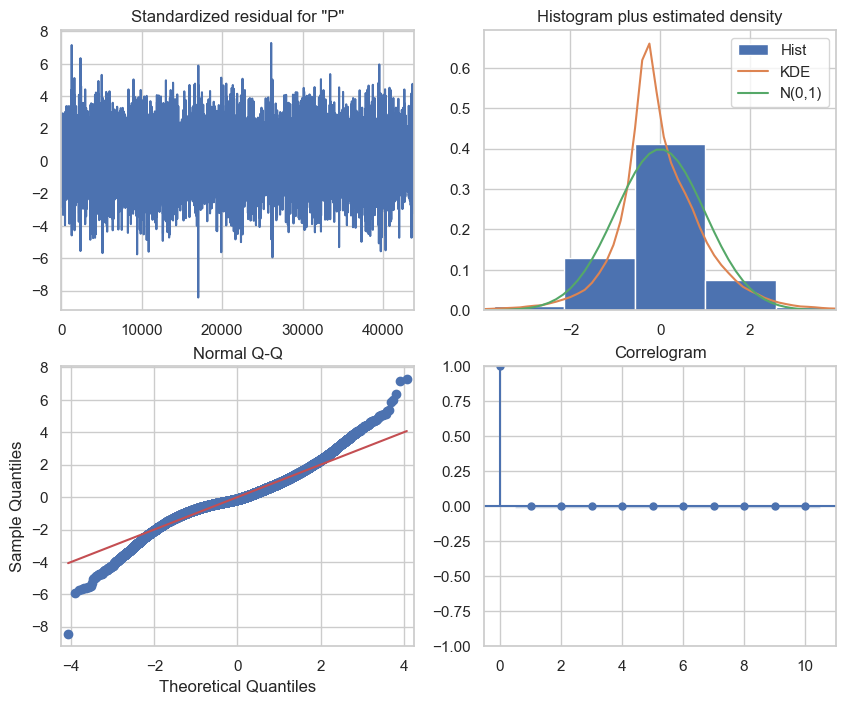

In [93]:
sarima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

In [134]:
start = len(endog) 
end = start + len(test) - 1
exog_forecast = test['Wind speed | (m/s)']
predictions = sarima_result.predict(start=start, end=end, dynamic=False, exog=exog_forecast.values)
test['BI_SARIMA_Prediction'] = predictions.values

/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/admin/Workspace/Time Series/tsenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [135]:
predicted = test['BI_SARIMA_Prediction']

r2 = r2_score(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

R² Score: 0.9084
Root Mean Squared Error (RMSE): 5.8609
Mean Squared Error (MSE): 34.3499
Mean Absolute Error (MAE): 5.0408


In [137]:
test.to_csv("results2.csv")

Bayesian time Series

In [150]:
from scipy.stats import norm, uniform

class BayesianTimeSeriesMixedModel:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.params = None
        self.component_weights = None
        self.samples = None
        
    def griddy_gibbs_step(self, data, param_grid, current_params):
        """
        Perform one step of griddy Gibbs sampling with numerical stability
        """
        likelihood = np.zeros(len(param_grid))
        
        for i, param in enumerate(param_grid):
            temp_params = current_params.copy()
            temp_params['beta'] = param
            likelihood[i] = self._compute_likelihood(data, temp_params)
        
        # Add small constant for numerical stability
        likelihood = np.clip(likelihood, 1e-300, None)
        # Log-sum-exp trick for numerical stability
        log_likelihood = np.log(likelihood)
        max_log_likelihood = np.max(log_likelihood)
        posterior = np.exp(log_likelihood - max_log_likelihood)
        posterior = posterior / np.sum(posterior)
        
        # Handle edge case where all probabilities are zero
        if np.all(np.isnan(posterior)):
            return current_params['beta']
            
        return np.random.choice(param_grid, p=posterior)
    
    def _compute_likelihood(self, data, params):
        """
        Compute likelihood with numerical stability
        """
        y = data['Power generated by system | (MW)'].values
        X = data['Wind speed | (m/s)'].values.reshape(-1, 1)
        
        pred = params['beta'] * X.flatten()
        # Use log likelihood for numerical stability
        log_likelihood = norm.logpdf(y, loc=pred, scale=params['sigma'])
        # Sum log likelihoods instead of multiplying
        return np.exp(np.sum(log_likelihood))
    
    def fit(self, data, n_iterations=1000):
        """
        Fit the model using Griddy Gibbs sampling
        """
        # Initialize storage for samples
        self.samples = {
            'beta': np.zeros((self.n_components, n_iterations)),
            'sigma': np.zeros((self.n_components, n_iterations)),
            'weights': np.zeros((self.n_components, n_iterations)),
            'component_indicators': np.zeros((len(data), n_iterations))
        }
        
        # Initialize parameters with reasonable values
        current_params = {
            'beta': np.random.uniform(0.1, 1.0, self.n_components),  # positive initialization
            'sigma': np.ones(self.n_components) * 0.5,  # smaller initial variance
            'weights': np.ones(self.n_components) / self.n_components
        }
        
        # Define parameter grids for Griddy Gibbs
        # Adjusted ranges based on typical wind power relationships
        beta_grid = np.linspace(0, 2, 100)  # positive coefficients only
        sigma_grid = np.linspace(0.1, 2, 100)  # reduced range
        
        # Main Gibbs sampling loop
        for iter in range(n_iterations):
            try:
                # Sample component indicators with error handling
                component_probs = self._compute_component_probabilities(data, current_params)
                
                # Handle any remaining NaN values
                component_probs = np.nan_to_num(component_probs, nan=1.0/self.n_components)
                # Ensure each row sums to 1
                component_probs = component_probs / component_probs.sum(axis=1, keepdims=True)
                
                component_indicators = np.array([
                    np.random.choice(self.n_components, p=p) for p in component_probs
                ])
                
                # Update parameters for each component
                for k in range(self.n_components):
                    component_data = data[component_indicators == k]
                    if len(component_data) > 0:
                        # Sample beta using Griddy Gibbs
                        current_params['beta'][k] = self.griddy_gibbs_step(
                            component_data, 
                            beta_grid,
                            {'beta': current_params['beta'][k], 'sigma': current_params['sigma'][k]}
                        )
                        
                        # Sample sigma using Griddy Gibbs
                        current_params['sigma'][k] = self.griddy_gibbs_step(
                            component_data,
                            sigma_grid,
                            {'beta': current_params['beta'][k], 'sigma': current_params['sigma'][k]}
                        )
                
                # Update mixture weights with smoothing
                component_counts = np.bincount(component_indicators, minlength=self.n_components)
                current_params['weights'] = (component_counts + 0.1) / (len(data) + 0.1 * self.n_components)
                
                # Store samples
                self.samples['beta'][:, iter] = current_params['beta']
                self.samples['sigma'][:, iter] = current_params['sigma']
                self.samples['weights'][:, iter] = current_params['weights']
                self.samples['component_indicators'][:, iter] = component_indicators
                
            except Exception as e:
                print(f"Warning: Error in iteration {iter}: {str(e)}")
                continue
    
    def _compute_component_probabilities(self, data, params):
        """
        Compute probability of each component for each observation with numerical stability
        """
        y = data['Power generated by system | (MW)'].values
        X = data['Wind speed | (m/s)'].values.reshape(-1, 1)
        
        log_probs = np.zeros((len(data), self.n_components))
        for k in range(self.n_components):
            pred = params['beta'][k] * X.flatten()
            # Compute log probabilities for numerical stability
            log_probs[:, k] = norm.logpdf(y, loc=pred, scale=params['sigma'][k]) + np.log(params['weights'][k])
        
        # Log-sum-exp trick for numerical stability
        max_log_probs = np.max(log_probs, axis=1, keepdims=True)
        probs = np.exp(log_probs - max_log_probs)
        probs = probs / np.sum(probs, axis=1, keepdims=True)
        
        return probs

class BayesianTimeSeriesForecaster(BayesianTimeSeriesMixedModel):
    def __init__(self, n_components=2):
        super().__init__(n_components)
        
    def predict(self, exog_forecast, n_samples=1000):
        """
        Generate predictions using posterior samples
        """
        if not isinstance(exog_forecast, np.ndarray):
            exog_forecast = np.array(exog_forecast)
            
        predictions = np.zeros((len(exog_forecast), n_samples))
        
        # Use last n_samples from MCMC chain for prediction
        burnin = self.samples['beta'].shape[1] - n_samples
        
        for i in range(n_samples):
            # Randomly select component based on weights
            component = np.random.choice(
                self.n_components, 
                p=self.samples['weights'][:, burnin + i]
            )
            
            # Generate prediction using selected component parameters
            beta = self.samples['beta'][component, burnin + i]
            sigma = self.samples['sigma'][component, burnin + i]
            
            predictions[:, i] = beta * exog_forecast + \
                            np.random.normal(0, sigma, size=len(exog_forecast))
            
        # Return mean prediction and prediction intervals
        mean_pred = np.mean(predictions, axis=1)
        pred_intervals = np.percentile(predictions, [2.5, 97.5], axis=1)
        
        return mean_pred, pred_intervals

In [151]:
data=df[['Power generated by system | (MW)','Wind speed | (m/s)']]

bayes_model = BayesianTimeSeriesForecaster(n_components=2)
bayes_model.fit(data, n_iterations=2000)

exog_forecast = test['Wind speed | (m/s)'].values
predictions, pred_intervals = bayes_model.predict(exog_forecast)

test['Bayesian_Prediction'] = predictions
actual = test['Power generated by system | (MW)'].values
predicted = test['Bayesian_Prediction'].values

/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/2208858765.py:46: RuntimeWarning: overflow encountered in exp
  return np.exp(np.sum(log_likelihood))
/var/folders/nx/qjk1687x5lq067mvl83vlw_c0000gn/T/ipykernel_61200/2208858765.py:26: RuntimeWarning: invalid value encountered in subtract
  posterior = np.exp(log_likelihood - max_log_likelihood)


In [152]:
r2 = r2_score(actual, predicted)
rmse = root_mean_squared_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print("\nModel Performance Metrics:")
print(f'R² Score: {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Model Performance Metrics:
R² Score: -0.2123
Root Mean Squared Error (RMSE): 21.3205
Mean Squared Error (MSE): 454.5637
Mean Absolute Error (MAE): 14.9537



Posterior Parameter Summary:
{'beta': {'mean': array([0., 0.]), 'std': array([0., 0.]), '95%_CI': array([[0., 0.],
       [0., 0.]])}, 'sigma': {'mean': array([0., 0.]), 'std': array([0., 0.]), '95%_CI': array([[0., 0.],
       [0., 0.]])}, 'weights': {'mean': array([0., 0.]), 'std': array([0., 0.]), '95%_CI': array([[0., 0.],
       [0., 0.]])}}

First few rows of predictions:
    Actual  Predicted  Lower_CI   Upper_CI
0  53.1810  10.978458  0.160867  21.599432
1  51.9083  10.756235  0.083928  21.070925
2  56.3540  11.282536 -0.013408  22.289653
3  54.9368  11.105148  0.223556  21.686490
4  57.7431  11.341666  0.018922  22.321701


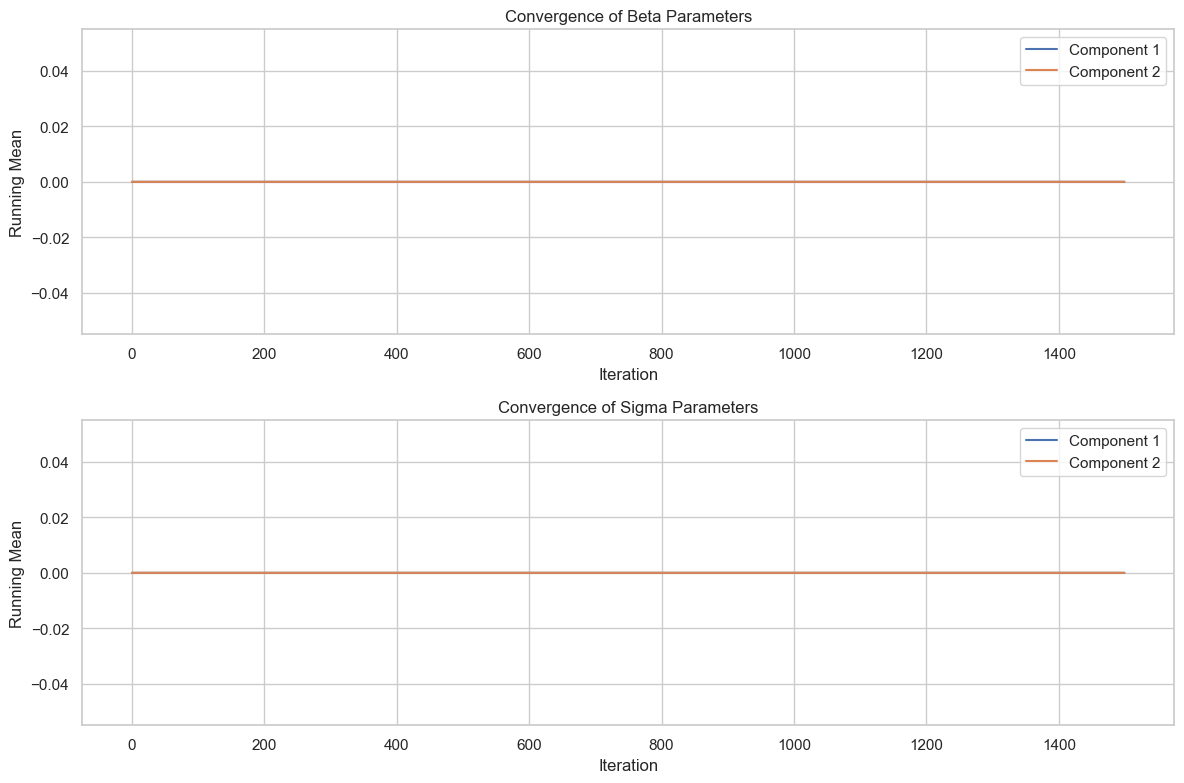

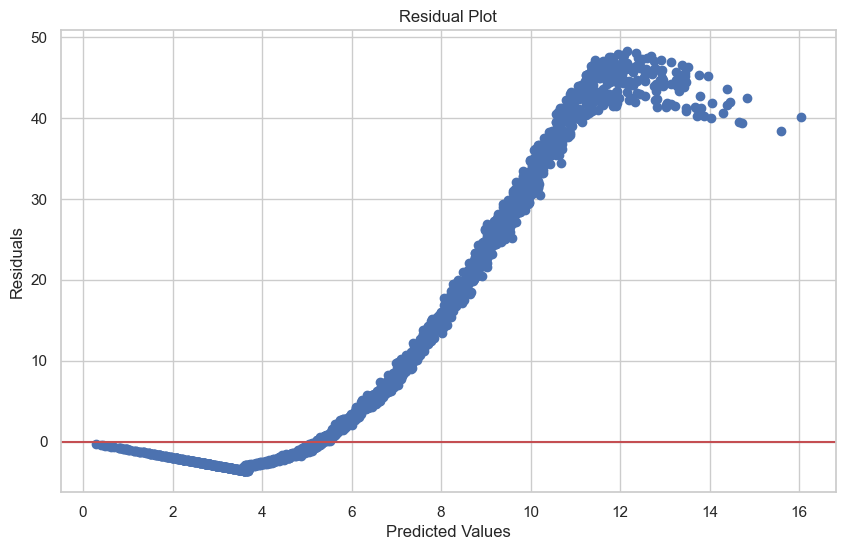

In [154]:
convergence_plot = model.check_convergence(burnin=500)
posterior_summary = model.get_posterior_summary(burnin=500)
print("\nPosterior Parameter Summary:")
print(posterior_summary)

# Create residual plot
residuals = actual - predicted
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Save predictions to dataframe
results_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted,
    'Lower_CI': pred_intervals[0],
    'Upper_CI': pred_intervals[1]
}, index=test.index)

print("\nFirst few rows of predictions:")
print(results_df.head())

In [156]:
test.to_csv('results3.csv')

Choosing Bivariate SARIMA Model

Actual vs Predicted

In [157]:
tt=pd.read_csv("results3.csv")
tt.head()

,Unnamed: 0,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW),RCA_Prediction,TAR_Prediction,STAR_Prediction,SETAR_Prediction,BI_SARIMA_Prediction,Bayesian_Prediction
0,0,2024-01-01 00:00:00,6.609,0.988077,10.868,53.1810,36.790800,49.585551,48.355427,48.355427,44.798280,10.978458
1,1,2024-01-01 01:00:00,5.257,0.988969,10.679,51.9083,14.975360,46.671578,44.672362,44.672362,43.596191,10.756235
2,2,2024-01-01 02:00:00,4.374,0.989708,11.200,56.3540,6.018210,44.309914,41.861304,41.861304,46.060935,11.282536
3,3,2024-01-01 03:00:00,2.913,0.990171,10.962,54.9368,2.538557,42.395875,39.715795,39.715795,44.413395,11.105148
4,4,2024-01-01 04:00:00,1.152,0.990264,11.307,57.7431,0.337344,40.844620,38.078260,38.078260,46.262516,11.341666


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

def analyze_time_series_predictions(data, model_name='BI_SARIMA_Prediction'):
    """
    Analyze time series predictions with visualizations and statistical metrics
    
    Parameters:
    data (pd.DataFrame): DataFrame with the specified columns
    model_name (str): Name of the prediction model to analyze 
    """
    # Calculate residuals
    data['Residuals'] = data['Power generated by system | (MW)'] - data[model_name]
    
    # Enable notebook display
    %matplotlib inline
    
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Actual vs Predicted Plot
    plt.subplot(2, 2, 1)
    plt.plot(data['DateTime'], data['Power generated by system | (MW)'], 
             'b-', label='Actual', marker='o', markersize=4)
    plt.plot(data['DateTime'], data[model_name], 
             'r--', label='Predicted', marker='s', markersize=4)
    plt.title(f'Actual vs {model_name.replace("_", " ")}', pad=10)
    plt.xlabel('DateTime')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.xticks(rotation=45)
    
    # 2. Residuals Plot
    plt.subplot(2, 2, 2)
    plt.bar(data['DateTime'], data['Residuals'], color='skyblue', alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals Plot', pad=10)
    plt.xlabel('DateTime')
    plt.ylabel('Residuals (MW)')
    plt.xticks(rotation=45)
    
    # 3. Q-Q Plot
    plt.subplot(2, 2, 3)
    stats.probplot(data['Residuals'], dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals', pad=10)
    
    # 4. Residuals Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data['Residuals'], kde=True, color='skyblue')
    plt.title('Residuals Distribution', pad=10)
    plt.xlabel('Residuals (MW)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    
    # Display the plot in the notebook
    display(plt.gcf())
    
    metrics = calculate_performance_metrics(data, model_name)
    
    # Print performance metrics
    print(f"\nModel Performance Metrics for {model_name}:")
    print(f"Root Mean Square Error (RMSE): {metrics['rmse']:.4f} MW")
    print(f"Mean Absolute Error (MAE): {metrics['mae']:.4f} MW")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['mape']:.2f}%")
    print(f"R-squared (R²): {metrics['r2']:.4f}")
    print(f"Mean of Residuals: {metrics['mean_residual']:.4f} MW")
    print(f"Standard Deviation of Residuals: {metrics['std_residual']:.4f} MW")
    
    # Print Shapiro-Wilk test results
    print("\nShapiro-Wilk Test for Normality of Residuals:")
    print(f"Statistic: {metrics['shapiro_stat']:.4f}")
    print(f"P-value: {metrics['shapiro_p']:.4f}")
    
    return fig, metrics

def calculate_performance_metrics(data, model_name):
    """Calculate various performance metrics for the time series predictions"""
    metrics = {}
    
    actual = data['Power generated by system | (MW)']
    predicted = data[model_name]
    residuals = data['Residuals']
    
    metrics['rmse'] = np.sqrt(mean_squared_error(actual, predicted))
    metrics['mae'] = mean_absolute_error(actual, predicted)
    metrics['mape'] = np.mean(np.abs((actual - predicted) / actual)) * 100
    metrics['r2'] = r2_score(actual, predicted)
    metrics['mean_residual'] = np.mean(residuals)
    metrics['std_residual'] = np.std(residuals)
    
    # Shapiro-Wilk test
    metrics['shapiro_stat'], metrics['shapiro_p'] = stats.shapiro(residuals)
    
    return metrics

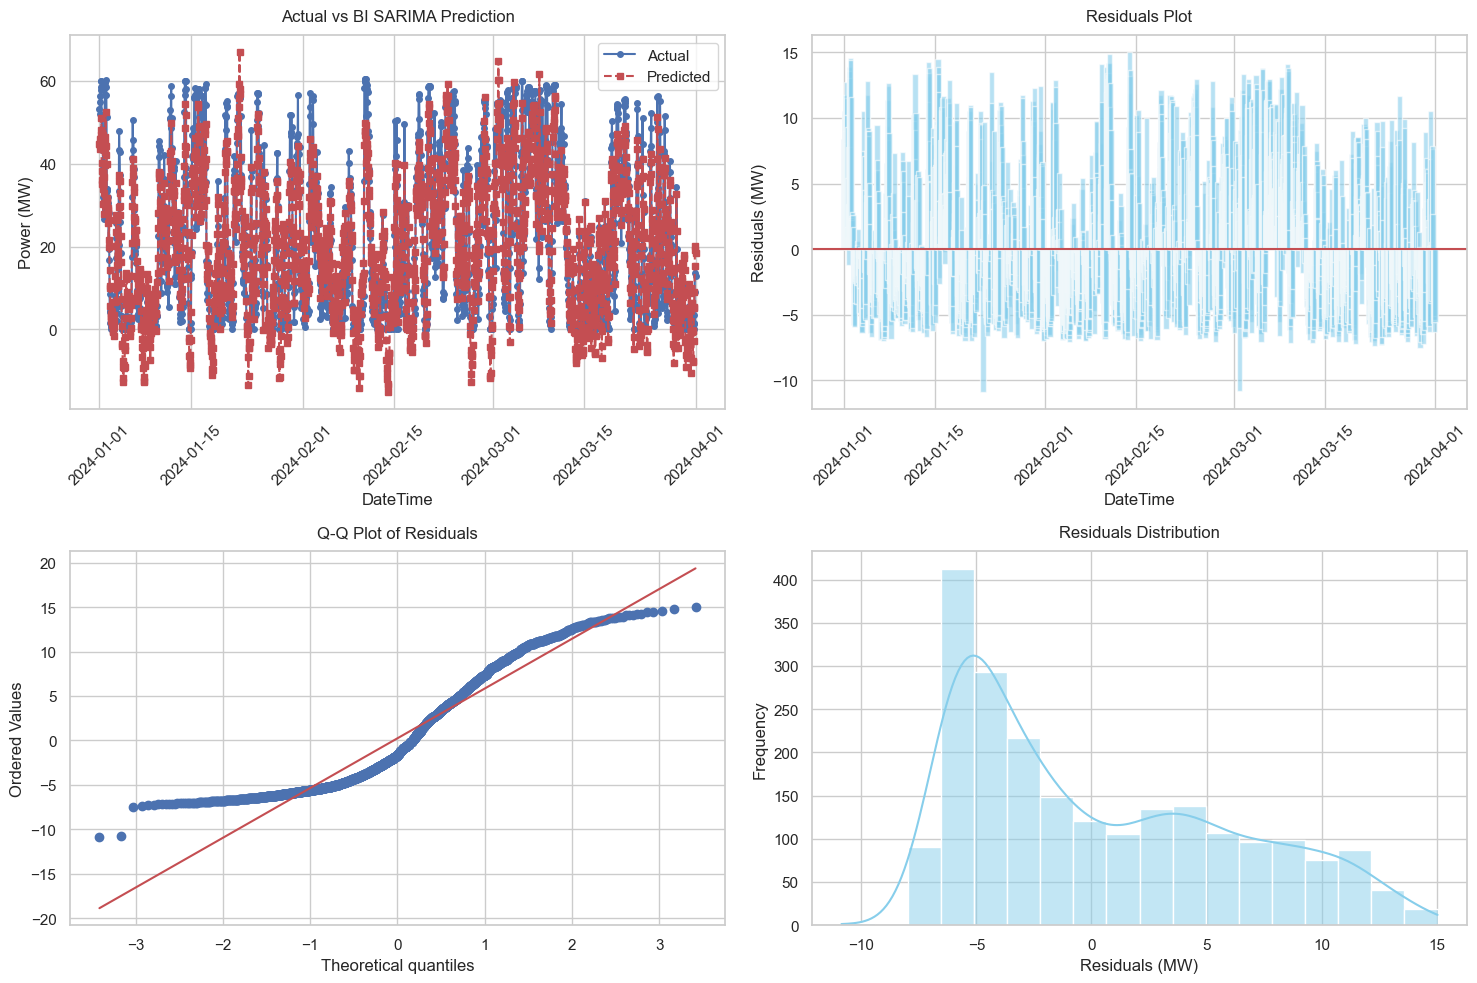


Model Performance Metrics for BI_SARIMA_Prediction:
Root Mean Square Error (RMSE): 5.8609 MW
Mean Absolute Error (MAE): 5.0408 MW
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R²): 0.9084
Mean of Residuals: 0.2393 MW
Standard Deviation of Residuals: 5.8560 MW

Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.9106
P-value: 0.0000


In [169]:
fig, metrics = analyze_time_series_predictions(tt, 'BI_SARIMA_Prediction')
plt.savefig('bi_sarima_model_analysis.png', dpi=300, bbox_inches='tight')
plt.close()